# Module Outline:

• Levels of Abstraction

• Schema & Instance

• Data Models

• Relational Databases

• DDL & DML

• SQL

• Database Design

# Levels of Abstraction

• Physical level: describes how a record (for example, instructor) is stored

• Logical level: describes data stored in database, and the relationships among the data
fields

    type instructor = record
    ID : string;
    name : string;
    dept name : string;
    salary : integer;
end;


• View level: application programs hide details of data types

• Views can also hide information (such as an employee’s salary) for security purposes

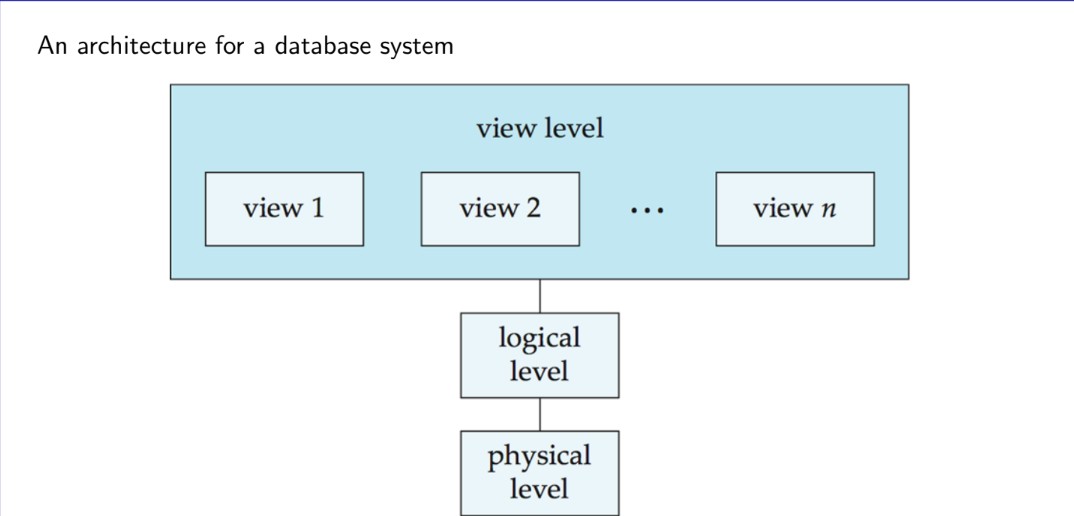

# Schema

• Similar to type of a variable and value of the variable at run-time in programming languages

• Schema
    ◦ Logical Schema – the overall logical structure of the database
    . Analogous to type information of a variable in a program
    . Customer Schema
    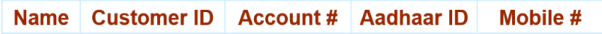
    . Example: The database consists of information about a set of customers and accounts in a bank and the relationship between them    
    . Account Schema
    
◦ Physical Schema– the overall physical structure of the database

# Instance

The structure of the table is schema while the content in it is instance.
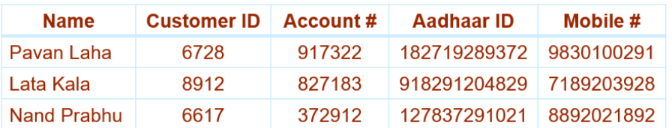

#  Data Models
A collection of tools for describing
    
    ◦ Data
    ◦ Data relationships
    ◦ Data semantics
    ◦ Data constraints

# Relational Databases

• All the data is stored in various tables

• Example of tabular data in the relational model

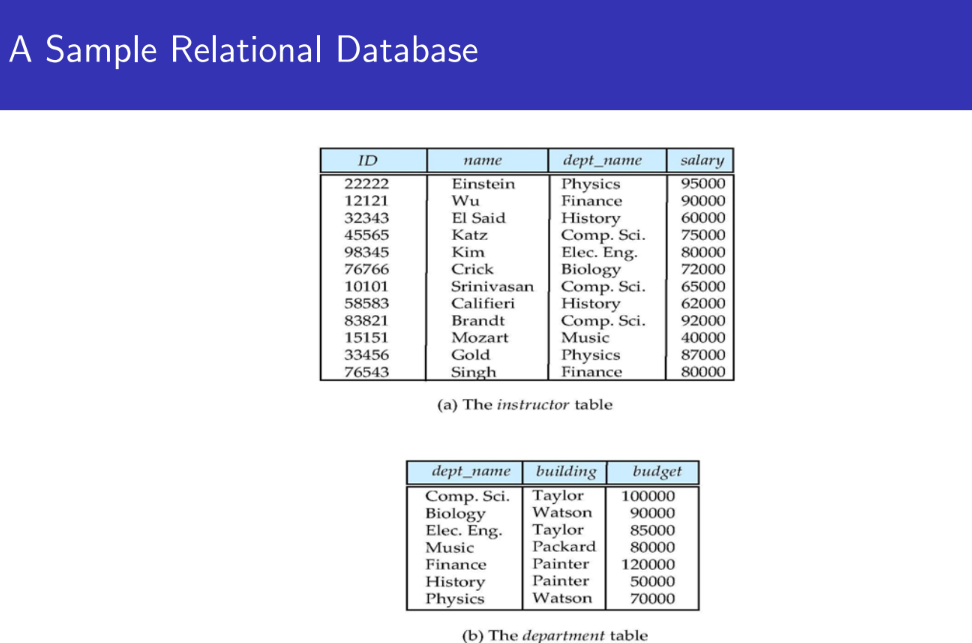

#  DDL

DDL (Data Definition Language) is used to define or structure the database. It helps create, modify, or delete the structure of a table, not the data inside it.

Think of DDL as deciding the shape of the container where your data will live.

DDL Commands-

    CREATE: Creates a table.
    ALTER: Changes the structure of a table (e.g., adding a new column).
    DROP: Deletes a table.
    TRUNCATE: Removes all data from a table but keeps the structure.



#  DML

DML (Data Manipulation Language) is used to interact with the data inside the table. It lets you insert, update, delete, or retrieve data.

Think of DML as putting things inside, taking them out, or changing what’s in the container.

DML Commands-

    INSERT: Adds data into a table.
    UPDATE: Changes data in a table.
    DELETE: Removes specific data from a table.
    SELECT: Retrieves data from a table.

# SQL

SQL stands for Structured Query Language. It’s the language used to communicate with databases. Think of SQL as a set of instructions you give to the database to:

Create the database structure-
    
       Add, update, delete, or retrieve data from the database.
       

It’s like asking a librarian (the database) to fetch, update, or manage books (data) in a library (the database).

# Database Design?
Database Design is the process of planning and structuring how data will be stored in a database. A well-designed database ensures:

    Data is organized and easy to work with.
    No duplication of data.
    Fast and efficient retrieval and updates.
    Think of database design as deciding:

👉👉What tables are needed (like deciding shelves for books).
👉👉How tables are related (like deciding which books go together).

In [7]:
import pandas as pd

In [8]:
file_path = r'C:\Users\alokg\Desktop\madras\DBMS\Week 1\Customer_Database.xlsx'

In [9]:
df = pd.read_excel(file_path)

In [10]:
df

,CustomerID,Name,Balance
0,1,Alok Gupta,5000
1,2,Akanksha Rath,2500
2,3,Aradhya Gupta,10000
3,4,Advik Gupta,3000
4,5,Anjali Gupta,7000
5,6,Swati Singh,1200
6,7,Aman Kumar,4500
7,8,Akash Verma,0
8,9,Abhay Sharma,6000
9,10,Allan Davis,9000


In [11]:
import sqlite3

In [12]:
#Python
# Create an SQLite database and populate it with the data from the Excel file
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create the Customers table
cursor.execute('''
CREATE TABLE Customers (
    CustomerID INTEGER PRIMARY KEY,
    Name TEXT,
    Balance REAL
)
''')

# Insert data into the database
df.to_sql('Customers', conn, if_exists='replace', index=False)

# Function to debit an amount from a customer's account
def debit_amount(customer_id, debit_amount):
    cursor.execute('SELECT Balance FROM Customers WHERE CustomerID = ?', (customer_id,))
    result = cursor.fetchone()
    
    if result is None:
        print("Customer not found.")
        return
    
    current_balance = result[0]
    if current_balance >= debit_amount:
        new_balance = current_balance - debit_amount
        cursor.execute('UPDATE Customers SET Balance = ? WHERE CustomerID = ?', (new_balance, customer_id))
        conn.commit()
        print(f"Transaction successful! New balance: {new_balance:.2f}")
    else:
        print("Insufficient balance.")

# Test the function
debit_amount(1, 1000)  # Example: Debit ₹1000 from customer with ID 1
debit_amount(8, 500)   # Example: Debit ₹500 from customer with ID 8 (should fail due to insufficient balance)

# Close the connection
conn.close()


Transaction successful! New balance: 4000.00
Insufficient balance.


In [13]:
# Assuming the table is named "Customers" after importing the Excel file

# Check if a customer is eligible to debit an amount
# Example: Customer ID 1 wants to debit ₹1000
DECLARE @CustomerID INT = 1;
DECLARE @DebitAmount DECIMAL(10, 2) = 1000.0;

SELECT 
    CASE 
        WHEN Balance >= @DebitAmount THEN 
            'Transaction successful! New Balance: ' + CAST((Balance - @DebitAmount) AS VARCHAR)
        ELSE 
            'Insufficient balance.'
    END AS Result
FROM Customers
WHERE CustomerID = @CustomerID;

# Update the balance if eligible
UPDATE Customers
SET Balance = Balance - @DebitAmount
WHERE CustomerID = @CustomerID AND Balance >= @DebitAmount;


SyntaxError: invalid syntax (2780820016.py, line 5)